In [65]:
import pandas
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [66]:
#read csv file
df = pandas.read_csv('data/class_data_3d.csv', header=None)
#table dimensions
col_count = df.shape[1]
#add column names
for i in range(col_count-1):
    df.rename(columns={i: 'X'+str(i)}, inplace=True)
df.rename(columns={col_count-1: 'Class'}, inplace=True)

#label encoder for class column
le = LabelEncoder()
df['Class_Enc'] = le.fit_transform(df['Class'])

df


,X0,X1,X2,Class,Class_Enc
0,1.0,1.0,1.0,A,0
1,1.1,1.1,1.1,A,0
2,1.2,1.2,1.2,A,0
3,1.3,1.3,1.3,D,3
4,2.0,2.0,2.0,B,1
5,2.1,2.1,2.1,B,1
6,2.2,2.2,2.2,B,1
7,2.3,2.3,2.3,B,1
8,3.0,3.0,3.0,C,2
9,3.1,3.1,3.1,C,2


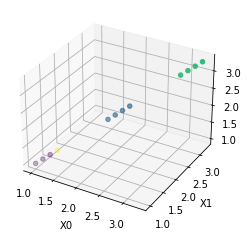

In [67]:
#plot data using last column as color group
if col_count == 3:
    sns.scatterplot(x='X0', y='X1', hue='Class', data=df)
elif col_count == 4:
    #plot scatterplot in 3d
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['X0'], df['X1'], df['X2'], c=df['Class_Enc'], marker='o')
    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
    ax.set_zlabel('X2')
    plt.show()
else:
    print('Cannot plot data with more than 3 dimensions')
    

    

In [68]:
# n dimensional eclidian distance
def distance(x, y):
    return sum([(x[i]-y[i])**2 for i in range(len(x))])**0.5


In [69]:
# distance between n dimensional points
test = [1.5, 1.5, 1.5]

# calculate distance between test point and all points in dataframe
df['Distance'] = df.apply(lambda row: distance(row[:-2], test), axis=1)

In [70]:
# sort by distance
df.sort_values(by=['Distance'])

,X0,X1,X2,Class,Class_Enc,Distance
3,1.3,1.3,1.3,D,3,0.346410
2,1.2,1.2,1.2,A,0,0.519615
1,1.1,1.1,1.1,A,0,0.692820
0,1.0,1.0,1.0,A,0,0.866025
4,2.0,2.0,2.0,B,1,0.866025
5,2.1,2.1,2.1,B,1,1.039230
6,2.2,2.2,2.2,B,1,1.212436
7,2.3,2.3,2.3,B,1,1.385641
8,3.0,3.0,3.0,C,2,2.598076
9,3.1,3.1,3.1,C,2,2.771281
